In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings 
warnings.filterwarnings("ignore")

In [102]:
df = pd.read_csv('data/testing_data.csv')

In [103]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [104]:
df.grade = df.grade.astype('category')
df.grade = df.grade.cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
                                                '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df.condition = df.condition.astype('category')
df.condition = df.condition.cat.reorder_categories(['Fair', 'Poor', 'Average',
                                                        'Good', 'Very Good'])
df.view = df.view.astype('category')
df.view = df.view.cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])

In [121]:
df.view = df.view.cat.codes
df.grade = df.grade.cat.codes
df.condition =df.condition.cat.codes

In [105]:
cities = {'Algona': [98001], 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093], 'Federal Way': [98001, 98003, 98023, 98063, 98093],
         'Beaux Arts Village': [98004], 'Bellevue':[98004, 98005, 98006, 98007, 98008, 98009, 98015], 
          'Clyde Hill': [98004], 'Hunts Point': [98004], 'Yarrow Point': [98004], 'Black Diamond': [98010],
         'Bothell': [98011, 98041, 98028], 'Burton': [98013], 'Vashion': [98013], 'Carnation': [98014],
         'Duvall':[98019], 'Enumclaw': [98022], 'Fall City': [98024], 'Hobart': [98025], 
         'Issaquah': [98027], 'Kent': [98030, 98031, 98032, 98035, 98042, 98064], 'Kirkland':[98033, 98034, 98083],
         'Maple Valley': [98038], 'Medina': [98039], 'Mercer Island': [98040], 'Kenmore': [98028],
         'Covington':[98042], 'North Bend': [98045], 'Pacific':[98047], 'Preston':[98050],
         'Ravensdale':[98051], 'Redmond': [98052, 98053, 98073, 98074], 'Redondo': [98054], 'Renton': [98055, 98056, 98057, 98058, 98059],
         'Newcastle': [98056, 98059,], 'Seahurst':[98062], 'Snoqualmie': [98065, 98068], 'Snoqualmie Pass': [98068],
         'Vashon': [98070], 'Woodinville': [98072], 'Sammamish':[98075, 98075], 'Issaquah': [98075, 98027, 98029],
         'Seattle': [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 
                     98126, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98171, 98174, 98177, 98178, 98188, 98198, 98199 ], 
          'Tukwila': [98108, 98138, 98168, 98178, 98188],
         'Shoreline': [98133, 98155, 98177 ], 'Burien': [98146, 98148, 98166, 98168 ], 'Des Moines' : [98148, 98198], 'Normandy Park': [98148, 98166, 98198], 'Seatac': [98148, 98158, 98168, 98188, 98198], 
          'Lake Forest Park': [98155, 98155, 98155], 'Baring': [98224], 'Skykomish': [98288]}

In [106]:
data = {}

for i in cities.keys():
    if i in df.columns:
        data[i] = df[df[i] == 1]
    else:
        continue

In [107]:
data.keys()

dict_keys(['Algona', 'Auburn', 'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill', 'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington', 'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon', 'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park'])

In [108]:
df.columns
outliers = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
           'has_basement', 'recently_renovated']

In [109]:
for i in data.keys():
    print("{}".format(i))
    print(data[i].loc[:, outliers].describe())
    print('       ')

Algona
               price    bedrooms   bathrooms  sqft_living       sqft_lot  \
count     361.000000  361.000000  361.000000   361.000000     361.000000   
mean   281194.869806    3.393352    2.011773  1903.783934   14967.002770   
std     98837.430520    0.726758    0.609274   653.794856   21213.757025   
min    100000.000000    1.000000    0.750000   770.000000    2064.000000   
25%    215000.000000    3.000000    1.500000  1440.000000    7245.000000   
50%    260000.000000    3.000000    2.000000  1824.000000    9292.000000   
75%    320000.000000    4.000000    2.500000  2240.000000   14439.000000   
max    850000.000000    6.000000    3.500000  5440.000000  239580.000000   

           floors  waterfront   sqft_above  sqft_basement  sqft_living15  \
count  361.000000       361.0   361.000000     361.000000     361.000000   
mean     1.430748         0.0  1723.756233     180.027701    1830.099723   
std      0.490942         0.0   630.886203     366.819528     494.591617   
min 

              price    bedrooms   bathrooms   sqft_living      sqft_lot  \
count  3.170000e+02  317.000000  317.000000    317.000000    317.000000   
mean   1.356524e+06    3.854890    2.527603   2909.022082  13104.220820   
std    7.460941e+05    0.976504    0.950634   1308.368630   6441.120122   
min    4.250000e+05    2.000000    1.000000    860.000000    779.000000   
25%    8.450000e+05    3.000000    1.750000   1910.000000   8879.000000   
50%    1.150000e+06    4.000000    2.500000   2660.000000  11119.000000   
75%    1.690000e+06    4.000000    3.250000   3850.000000  16200.000000   
max    7.060000e+06   10.000000    6.000000  10040.000000  44384.000000   

           floors  waterfront   sqft_above  sqft_basement  sqft_living15  \
count  317.000000  317.000000   317.000000     317.000000     317.000000   
mean     1.432177    0.003155  2419.842271     489.179811    2674.700315   
std      0.516475    0.056166  1140.285874     633.315534     743.307049   
min      1.000000   

max    310582.00000      1.000000             1.00000  
       
Issaquah
              price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count  1.092000e+03  1092.000000  1092.000000  1092.000000  1.092000e+03   
mean   6.728556e+05     3.608974     2.594551  2611.836996  2.119512e+04   
std    2.812136e+05     0.786010     0.663677   958.688906  4.953858e+04   
min    1.300000e+05     1.000000     1.000000   600.000000  6.830000e+02   
25%    5.100000e+05     3.000000     2.250000  1900.000000  4.772500e+03   
50%    6.270000e+05     4.000000     2.500000  2505.000000  8.226500e+03   
75%    7.732500e+05     4.000000     2.750000  3160.000000  1.650650e+04   
max    3.200000e+06     7.000000     6.500000  7850.000000  1.074218e+06   

            floors   waterfront   sqft_above  sqft_basement  sqft_living15  \
count  1092.000000  1092.000000  1092.000000    1092.000000    1092.000000   
mean      1.798535     0.009158  2367.029304     237.225275    2526.946886   
std     

              price    bedrooms   bathrooms  sqft_living      sqft_lot  \
count  2.200000e+02  220.000000  220.000000   220.000000  2.200000e+02   
mean   4.402323e+05    3.240909    2.120455  2070.477273  5.019431e+04   
std    2.075541e+05    0.648961    0.714120   948.355883  1.057519e+05   
min    1.750000e+05    1.000000    0.750000   780.000000  3.000000e+03   
25%    3.065000e+05    3.000000    1.750000  1370.000000  9.681750e+03   
50%    4.047500e+05    3.000000    2.250000  1830.000000  1.250450e+04   
75%    4.952500e+05    4.000000    2.500000  2625.000000  4.055800e+04   
max    1.950000e+06    5.000000    6.000000  7420.000000  1.024068e+06   

           floors  waterfront   sqft_above  sqft_basement  sqft_living15  \
count  220.000000       220.0   220.000000     220.000000     220.000000   
mean     1.504545         0.0  1943.750000     126.727273    1917.977273   
std      0.489597         0.0   868.401227     349.151899     694.949901   
min      1.000000         0.0

              price    bedrooms   bathrooms  sqft_living      sqft_lot  \
count  8.530000e+02  853.000000  853.000000   853.000000    853.000000   
mean   2.948414e+05    3.206331    1.702227  1653.443142   8855.599062   
std    1.239193e+05    0.970024    0.738758   662.147095   5741.197917   
min    7.800000e+04    1.000000    0.750000   380.000000    958.000000   
25%    2.200000e+05    3.000000    1.000000  1150.000000   6000.000000   
50%    2.720000e+05    3.000000    1.750000  1560.000000   7599.000000   
75%    3.405000e+05    4.000000    2.000000  2030.000000   9750.000000   
max    1.700000e+06    6.000000    4.500000  4940.000000  67953.000000   

           floors  waterfront   sqft_above  sqft_basement  sqft_living15  \
count  853.000000  853.000000   853.000000     853.000000     853.000000   
mean     1.225674    0.010551  1317.893318     329.824150    1574.016413   
std      0.388822    0.102235   498.454022     430.280607     396.202223   
min      1.000000    0.000000

In [110]:
df.lat, df.long

(0        47.5112
 1        47.7210
 2        47.7379
 3        47.5208
 4        47.6168
           ...   
 21394    47.6993
 21395    47.5107
 21396    47.5944
 21397    47.5345
 21398    47.5941
 Name: lat, Length: 21399, dtype: float64,
 0       -122.257
 1       -122.319
 2       -122.233
 3       -122.393
 4       -122.045
           ...   
 21394   -122.346
 21395   -122.362
 21396   -122.299
 21397   -122.069
 21398   -122.299
 Name: long, Length: 21399, dtype: float64)

In [111]:
from math import cos, sin, atan2, sqrt, pi

def center_geolocation(geolocations):
    """
    Provide a relatively accurate center lat, lon returned as a list pair, given
    a list of list pairs.
    ex: in: geolocations = ((lat1,lon1), (lat2,lon2),)
        out: (center_lat, center_lon)
    """
    x = 0
    y = 0
    z = 0

    for lat, lon in geolocations:
        lat = float(lat *(pi/180))
        lon = float(lon * (pi/180))
        x += cos(lat) * cos(lon)
        y += cos(lat) * sin(lon)
        z += sin(lat)

    x = float(x / len(geolocations))
    y = float(y / len(geolocations))
    z = float(z / len(geolocations))
    
    degrees1 = atan2(z, sqrt(x * x + y * y))
    degrees2 = atan2(y, x)

    return (degrees1 * (180/pi), degrees2 *(180/pi))

In [112]:
coordinates = {}

for i in data.keys():
    x = data[i]['lat']
    y = data[i]['long']
    pair = list(zip(x,y))
    
    coordinates[i] = pair
    
    

    

In [113]:
center_location = {}

for i in data.keys():
    center_location[i] = center_geolocation(coordinates[i])

In [114]:
for i in center_location.keys():
    print('{} : {}'.format(i, center_location[i]))

Algona : (47.309106343981384, -122.27070044933522)
Auburn : (47.30854005572448, -122.27676582103699)
Federal Way : (47.31053224165728, -122.32132927351802)
Beaux Arts Village : (47.616183826606125, -122.20518721213313)
Bellevue : (47.59390218225879, -122.15570714644898)
Clyde Hill : (47.616183826606125, -122.20518721213313)
Hunts Point : (47.616183826606125, -122.20518721213313)
Yarrow Point : (47.616183826606125, -122.20518721213313)
Black Diamond : (47.333218058574275, -121.99947283065686)
Bothell : (47.75516310891854, -122.22772946271448)
Carnation : (47.671627810177164, -121.84858639209433)
Duvall : (47.73710920443352, -121.95483585247659)
Enumclaw : (47.21123075623289, -121.99554880772615)
Fall City : (47.55876680494092, -121.90547261010268)
Issaquah : (47.554457705248, -122.02523399866831)
Kent : (47.375893695872826, -122.16518645535287)
Kirkland : (47.70273832807398, -122.19865397295318)
Maple Valley : (47.37064204472687, -122.03175526548821)
Medina : (47.6258401004965, -122.233

In [115]:
center_location.pop('Clyde Hill')
center_location.pop('Hunts Point')
center_location.pop('Yarrow Point')


(47.616183826606125, -122.20518721213313)

In [117]:
for i in data.keys():
    print('{} : {}'.format(i, len(data[i])))

Algona : 361
Auburn : 1690
Federal Way : 1140
Beaux Arts Village : 317
Bellevue : 1407
Clyde Hill : 317
Hunts Point : 317
Yarrow Point : 317
Black Diamond : 100
Bothell : 478
Carnation : 124
Duvall : 190
Enumclaw : 233
Fall City : 80
Issaquah : 1092
Kent : 1201
Kirkland : 977
Maple Valley : 589
Medina : 50
Mercer Island : 282
Kenmore : 283
Covington : 547
North Bend : 220
Redmond : 1418
Renton : 1597
Newcastle : 874
Snoqualmie : 308
Vashon : 117
Woodinville : 273
Sammamish : 359
Seattle : 8973
Tukwila : 853
Shoreline : 1194
Burien : 868
Des Moines : 337
Normandy Park : 591
Seatac : 742
Lake Forest Park : 446


In [122]:
regions_df = {}

regions_df['Southwest'] = df[(df['Federal Way'] == 1) | (df['Auburn'] == 1) | (df['Algona'] == 1)]
regions_df['Southeast'] = df[(df['Enumclaw'] == 1) | (df['Black Diamond'] == 1) | (df['Maple Valley'] == 1) | 
                             (df['Covington'] == 1) | (df['Kent'] == 1)]
regions_df['Island'] = df[df['Vashon'] == 1]

regions_df['South_of_Seattle'] = df[(df['Des Moines'] == 1) | (df['Normandy Park'] == 1) | (df['Seatac'] == 1) | 
                             (df['Burien'] == 1) | (df['Tukwila'] == 1)]
regions_df['Seattle'] = df[df['Seattle'] == 1]
regions_df['Southeast_of_Seattle'] = df[(df['Renton'] == 1) | (df['Newcastle'] == 1)]
regions_df['Rich'] = df[(df['Mercer Island'] == 1) | (df['Bellevue'] == 1) | (df['Beaux Arts Village'] == 1) | 
                             (df['Medina'] == 1)]
regions_df['Kirkland'] = df[df['Kirkland'] == 1]
regions_df['Northeast'] = df[(df['Kenmore'] == 1) | (df['Bothell'] == 1) | (df['Woodinville'] == 1)]
regions_df['North'] = df[(df['Shoreline'] == 1) | (df['Lake Forest Park'] == 1)]
regions_df['Redmond'] = df[df['Redmond'] == 1]
regions_df['Suburan'] = df[(df['Sammamish'] == 1) | (df['Issaquah'] == 1)]
regions_df['Rural'] = df[(df['Duvall'] == 1) | (df['Carnation'] == 1) | (df['Fall City'] == 1) | 
                             (df['Snoqualmie'] == 1) | (df['North Bend'] == 1)]


<Figure size 640x480 with 0 Axes>

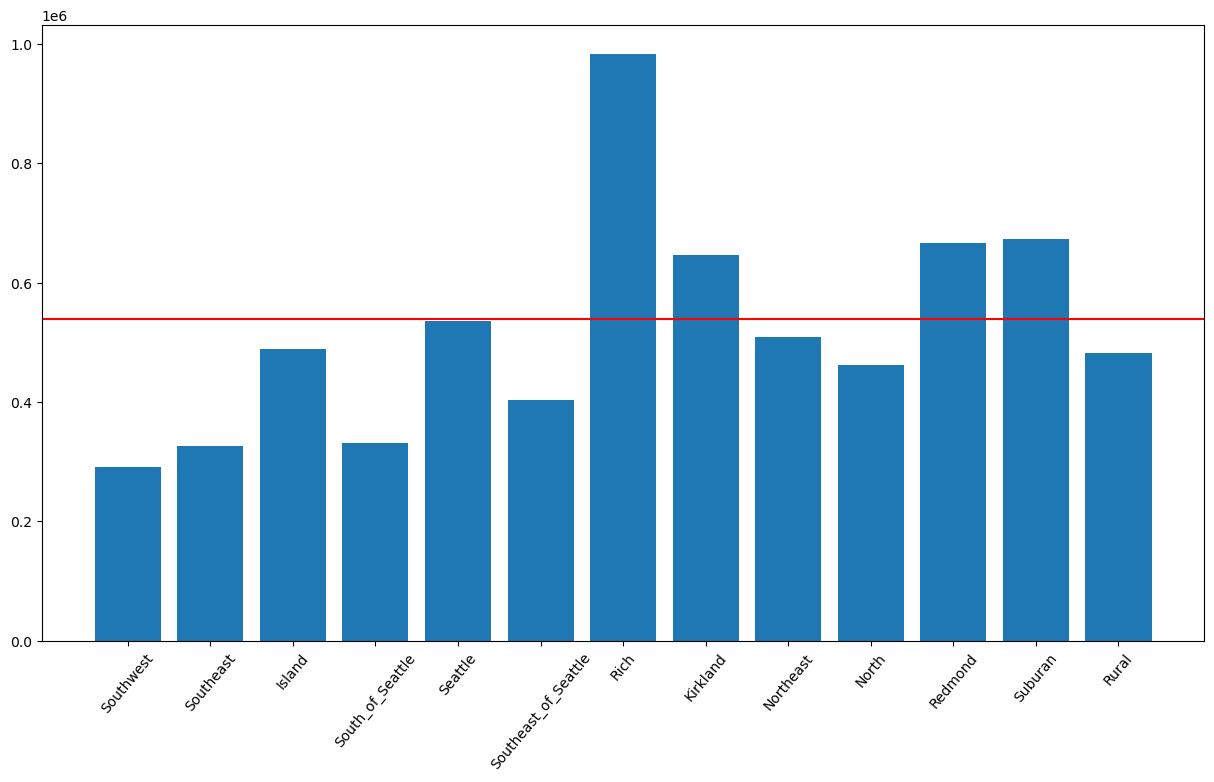

In [119]:
mean_prices = []

for i in regions_df.keys():
    mean_prices.append(regions_df[i]['price'].mean())
    
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(list(range(len(mean_prices))), mean_prices)
ax.set_xticks(list(range(len(mean_prices))))
ax.set_xticklabels(regions_df.keys(), rotation=50)
ax.axhline(y = df.price.mean(), color = 'r', linestyle = '-')

plt.show()

This is : Southwest


<Figure size 640x480 with 0 Axes>

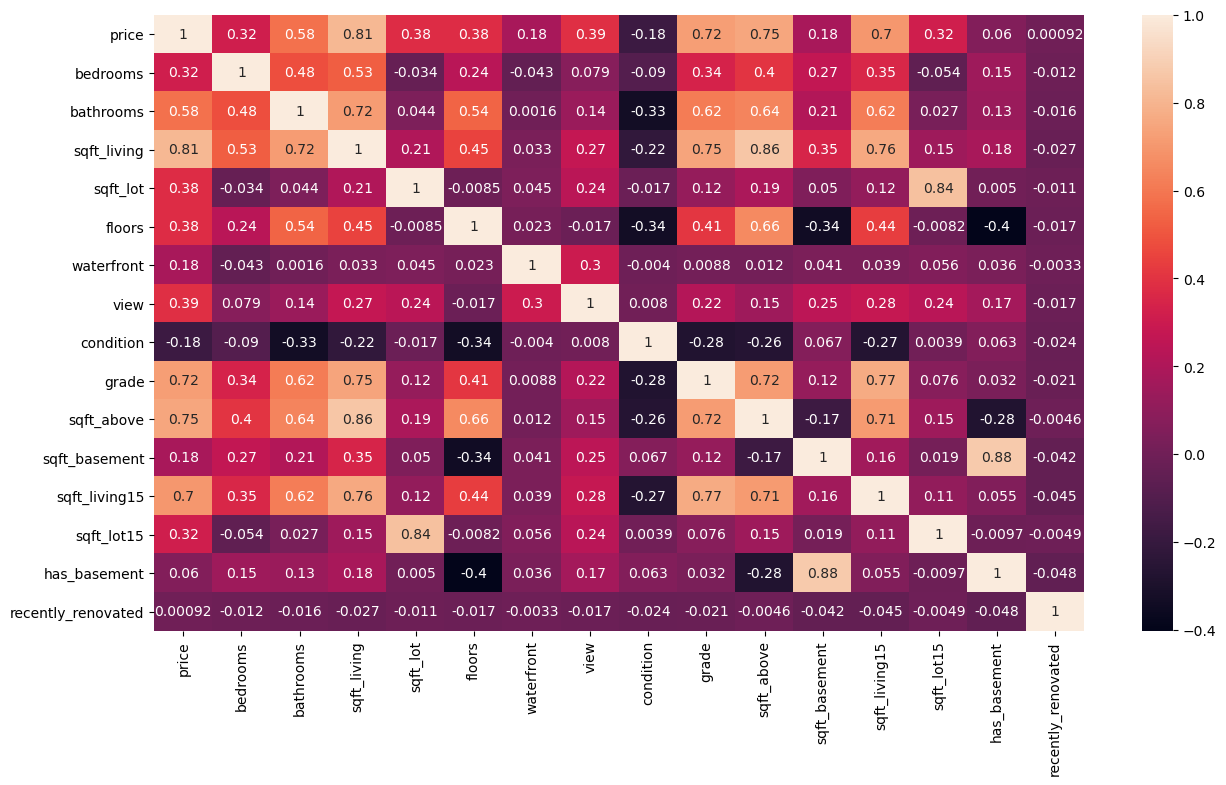

This is : Southeast


<Figure size 640x480 with 0 Axes>

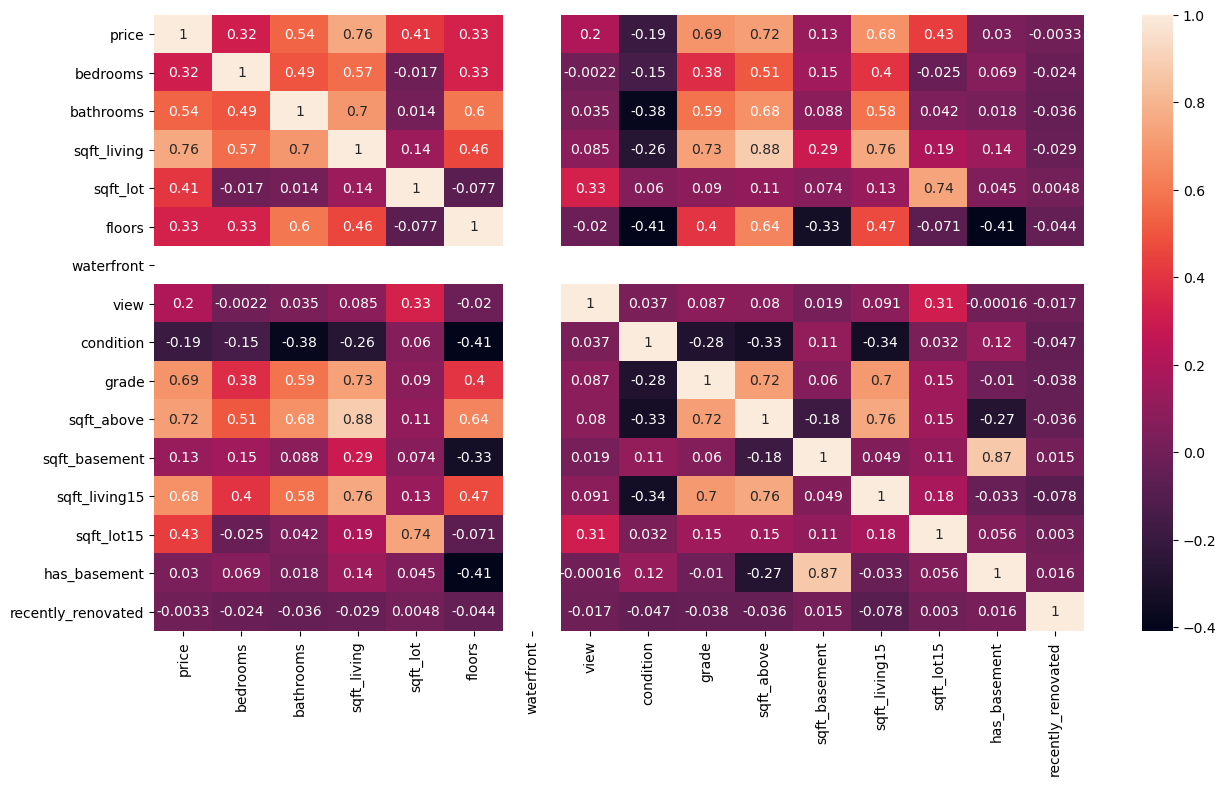

This is : Island


<Figure size 640x480 with 0 Axes>

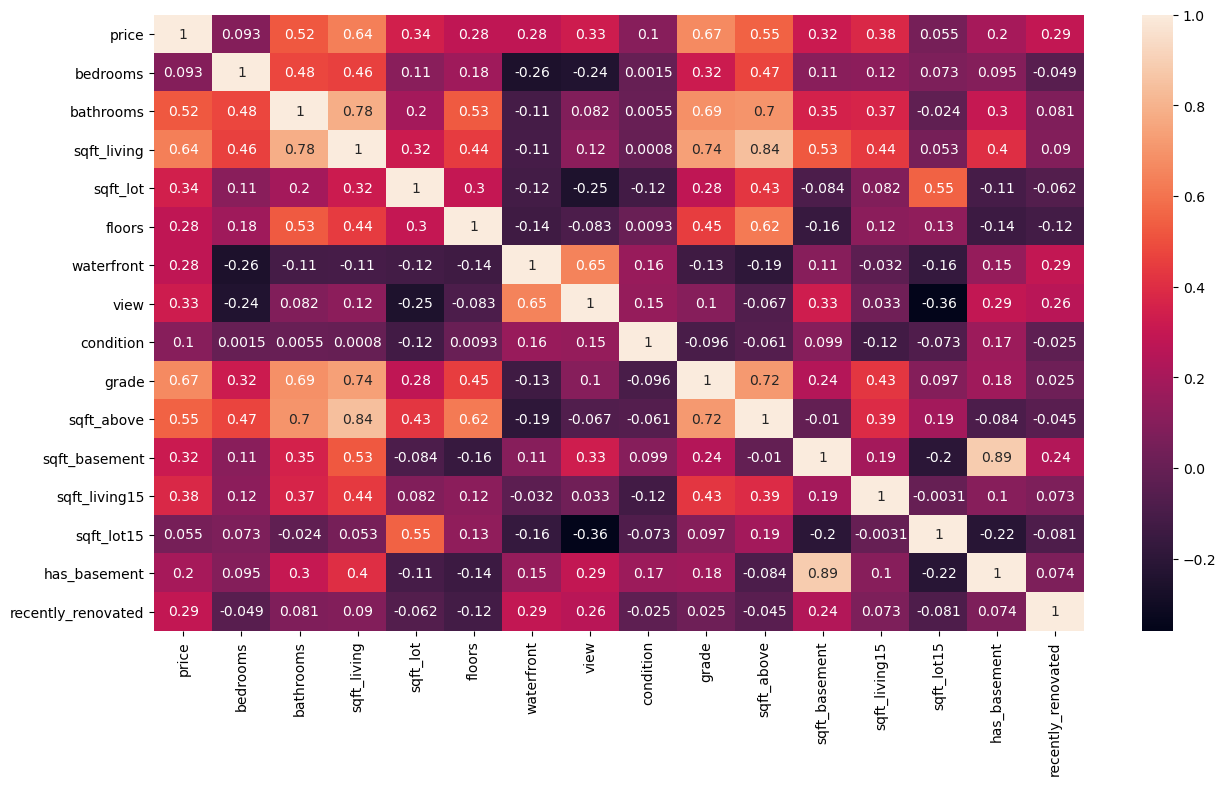

This is : South_of_Seattle


<Figure size 640x480 with 0 Axes>

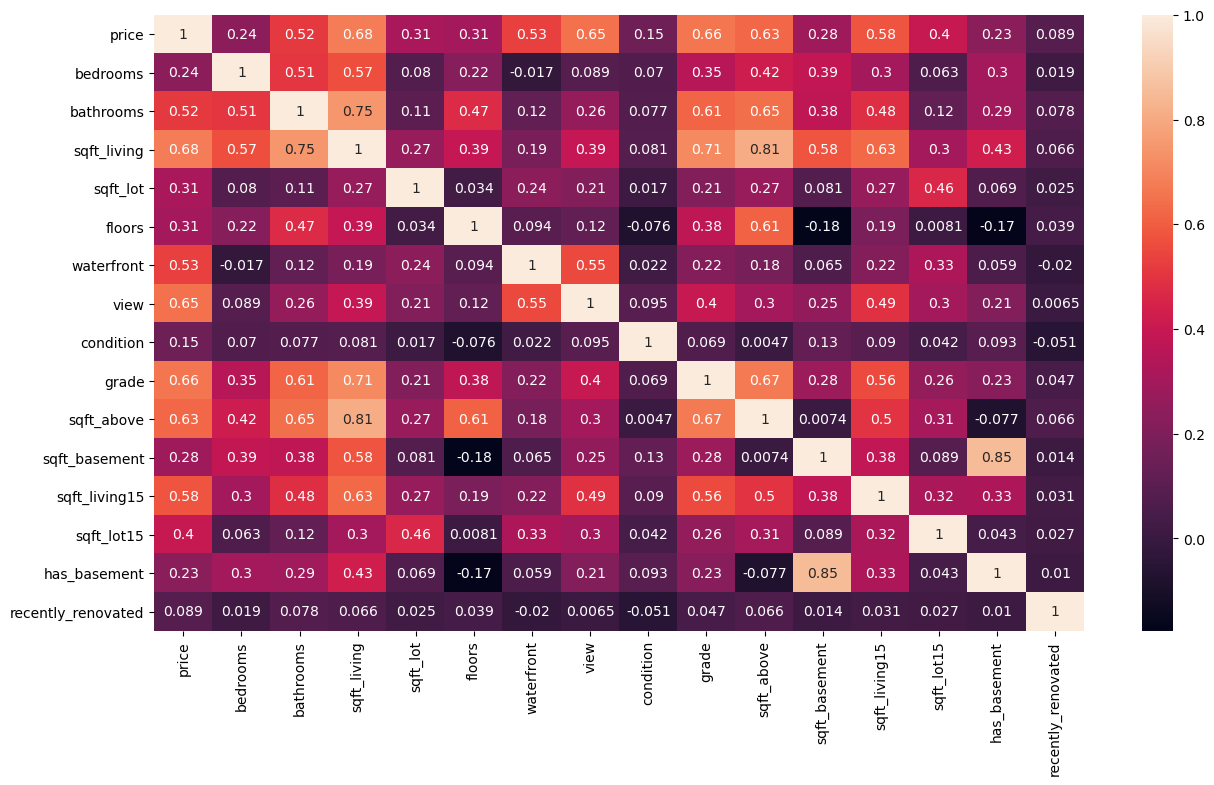

This is : Seattle


<Figure size 640x480 with 0 Axes>

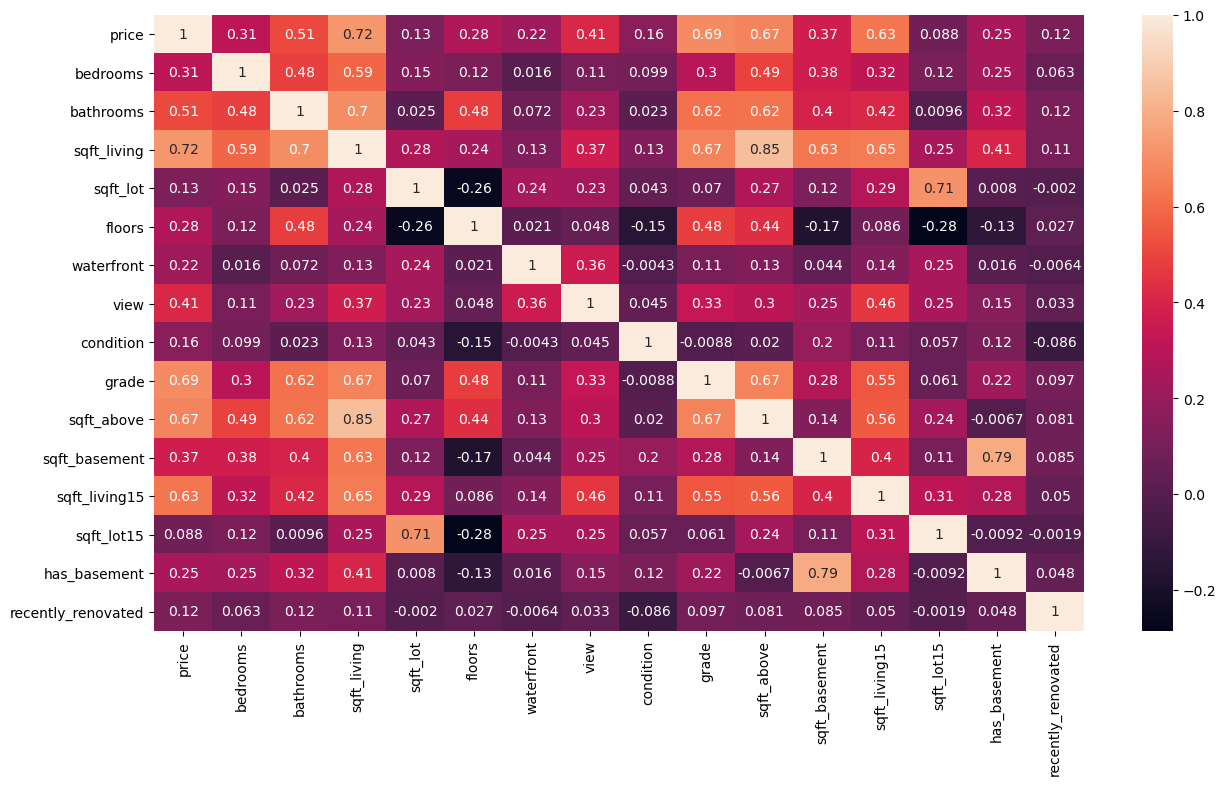

This is : Southeast_of_Seattle


<Figure size 640x480 with 0 Axes>

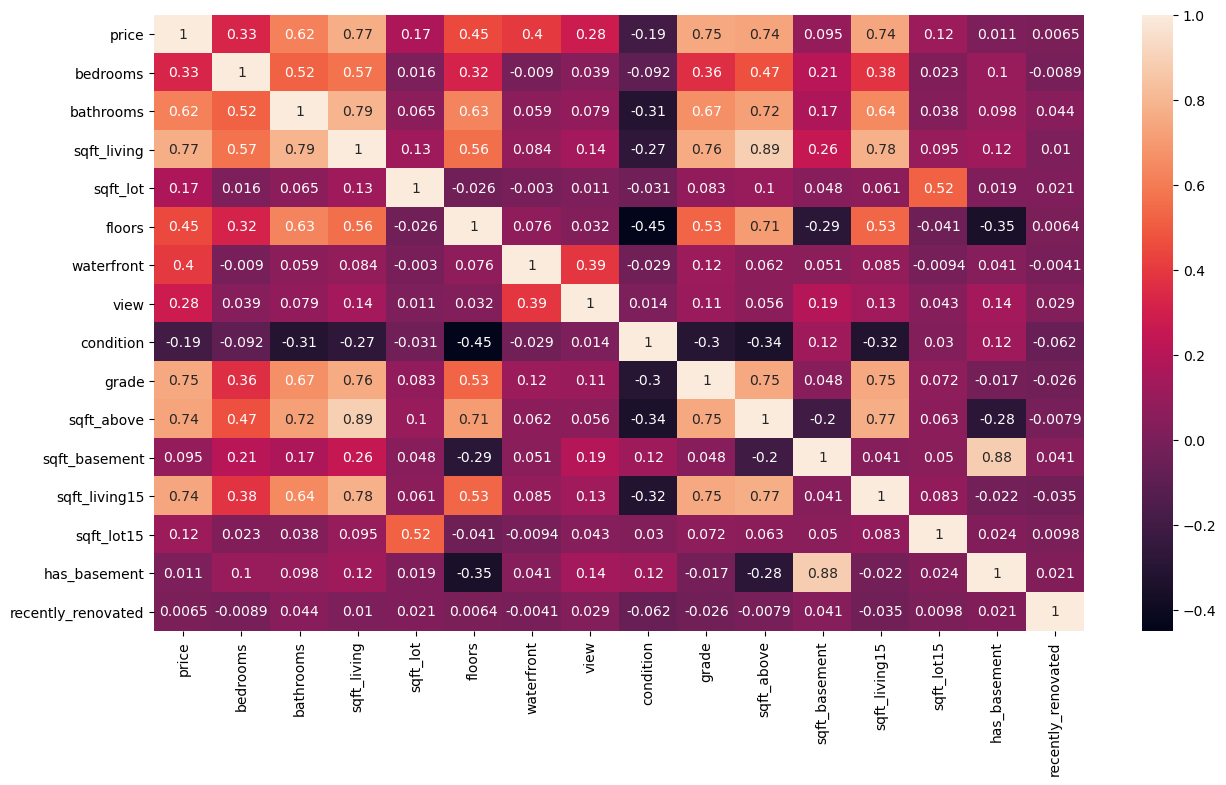

This is : Rich


<Figure size 640x480 with 0 Axes>

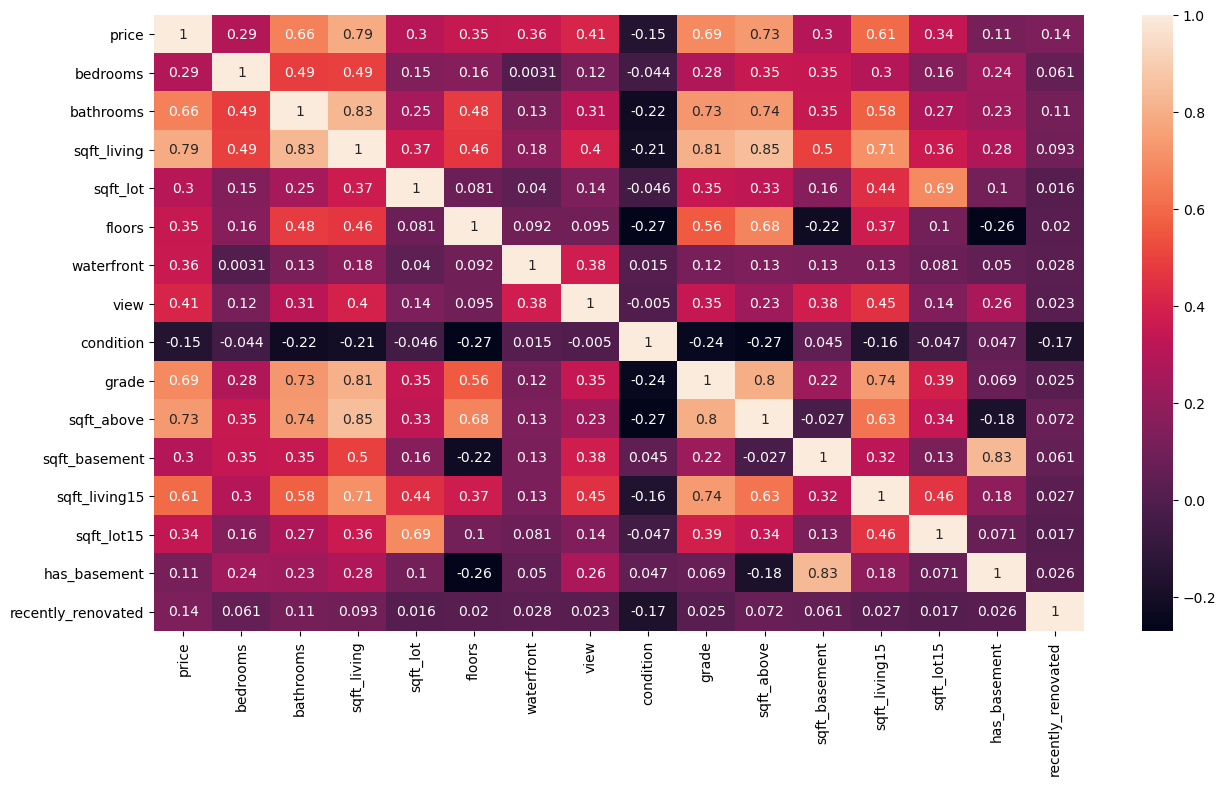

This is : Kirkland


<Figure size 640x480 with 0 Axes>

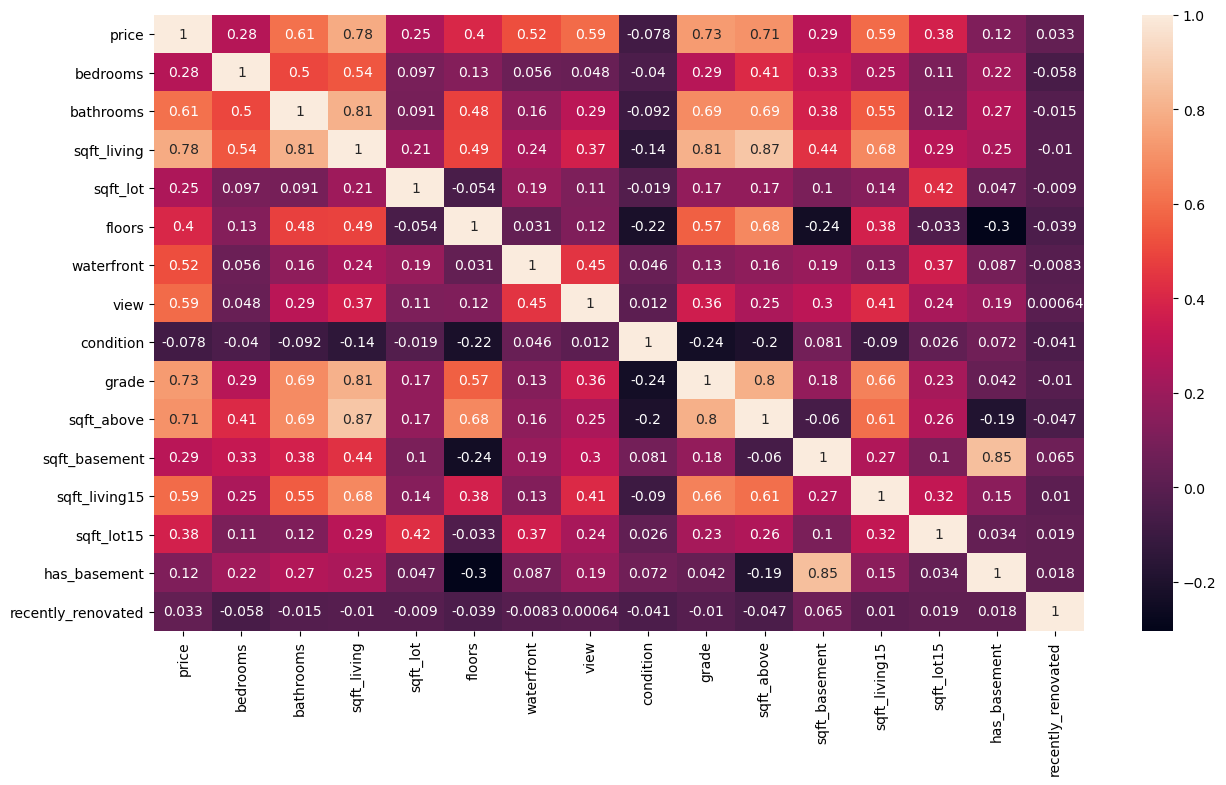

This is : Northeast


<Figure size 640x480 with 0 Axes>

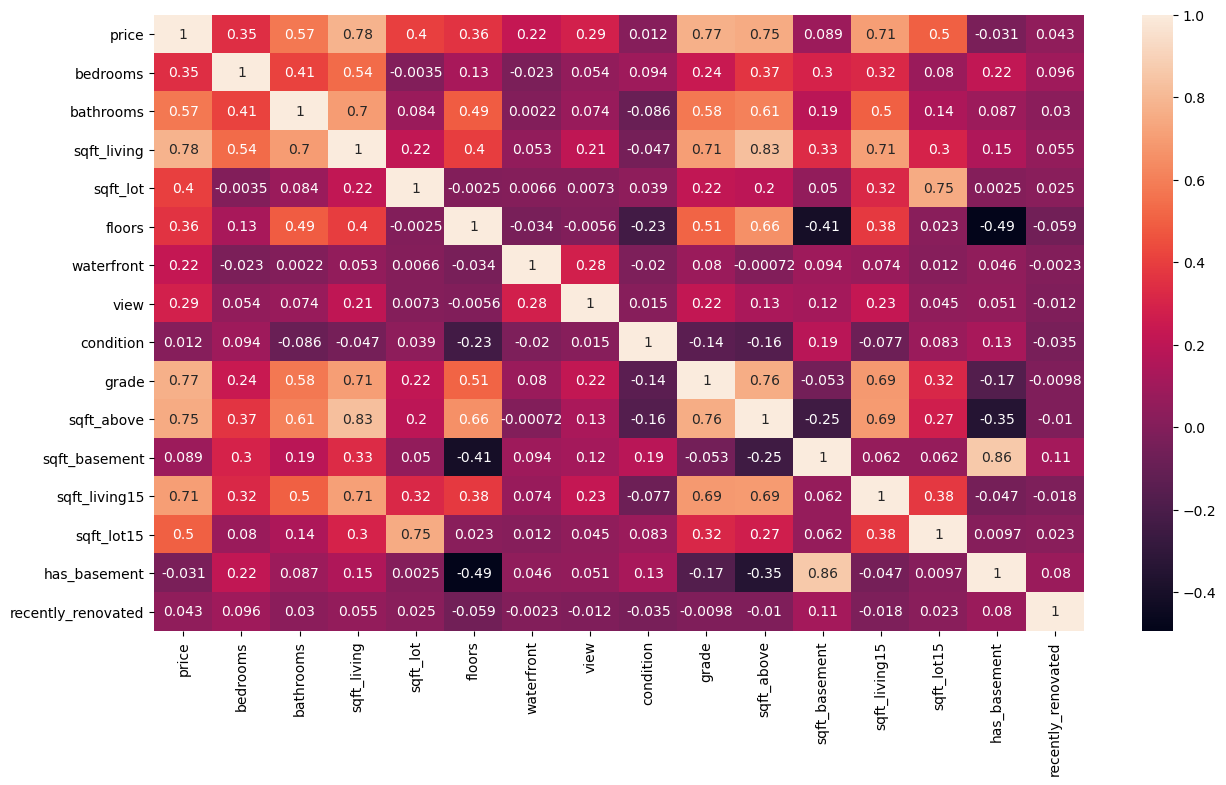

This is : North


<Figure size 640x480 with 0 Axes>

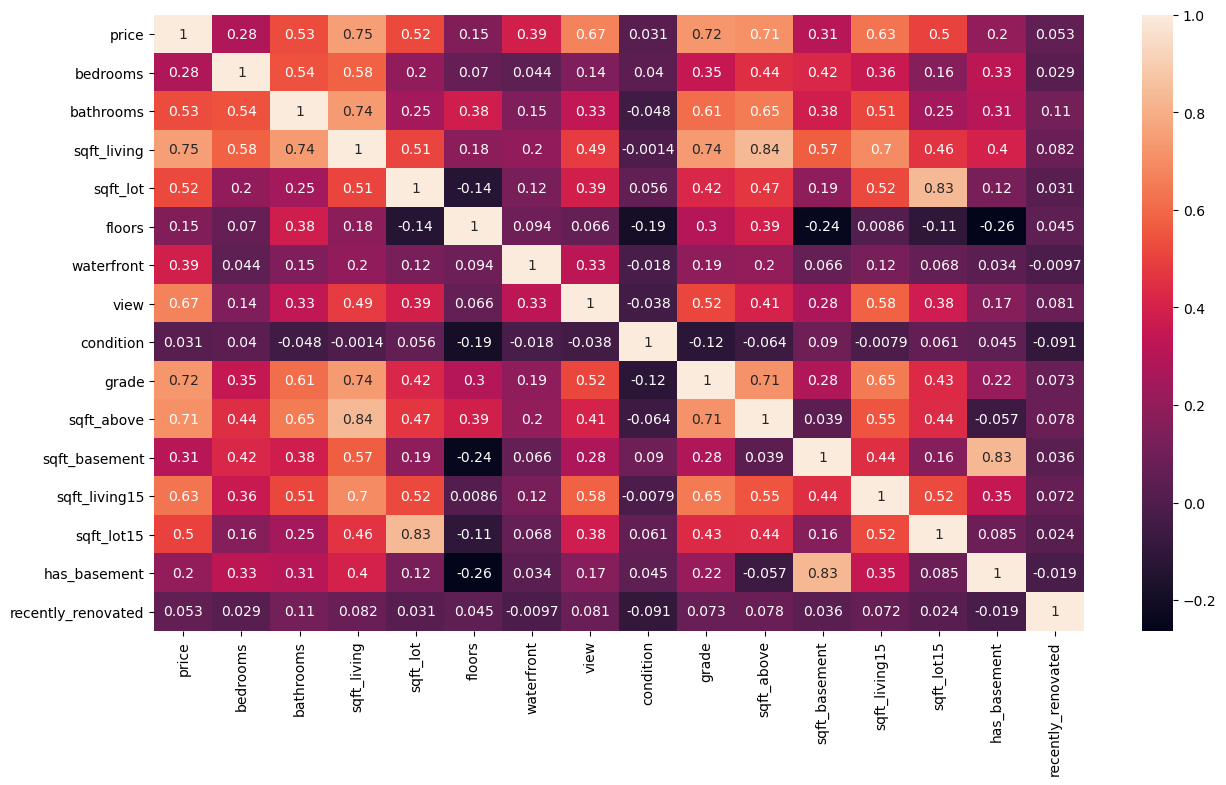

This is : Redmond


<Figure size 640x480 with 0 Axes>

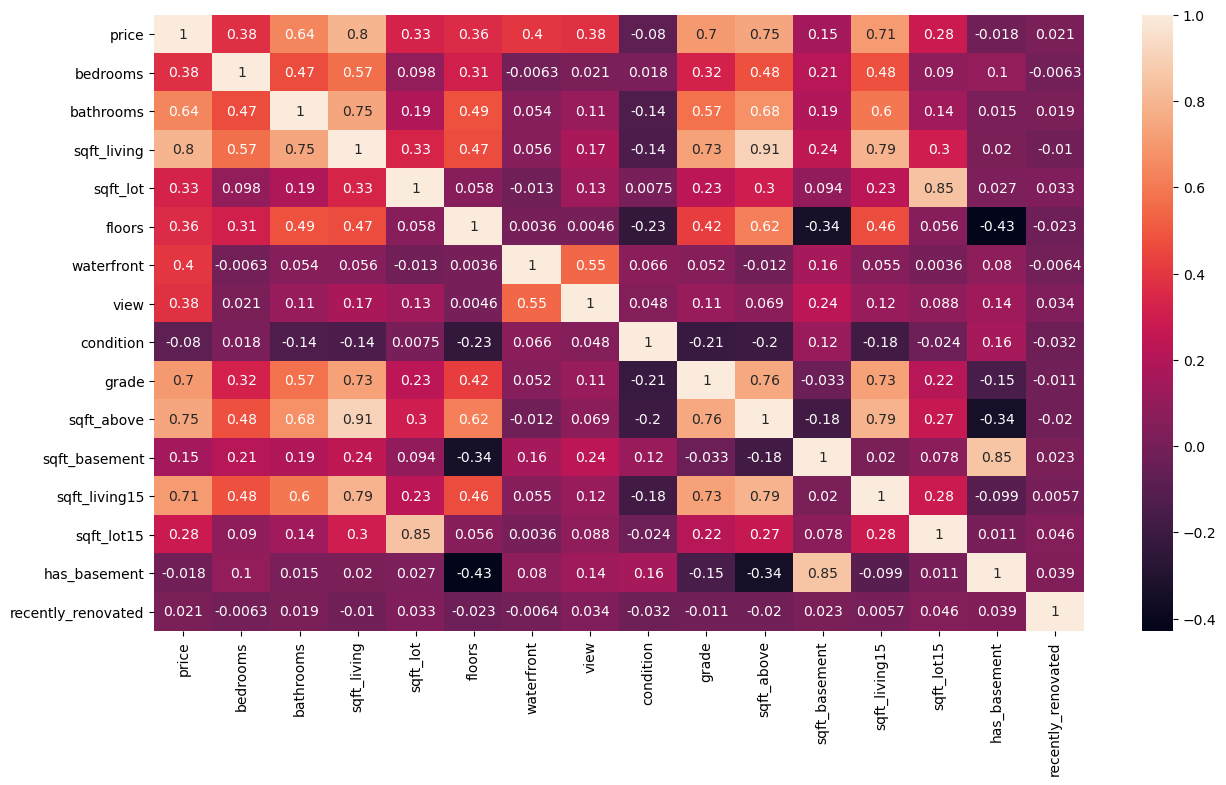

This is : Suburan


<Figure size 640x480 with 0 Axes>

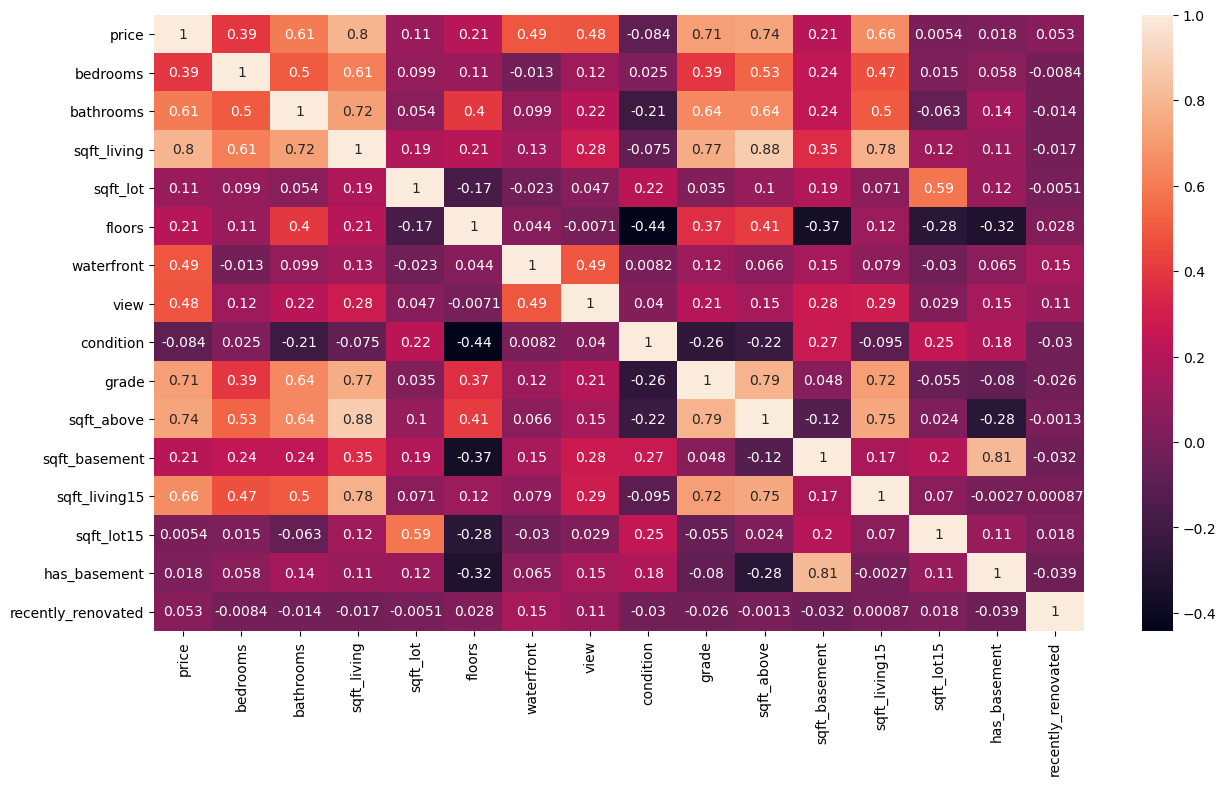

This is : Rural


<Figure size 640x480 with 0 Axes>

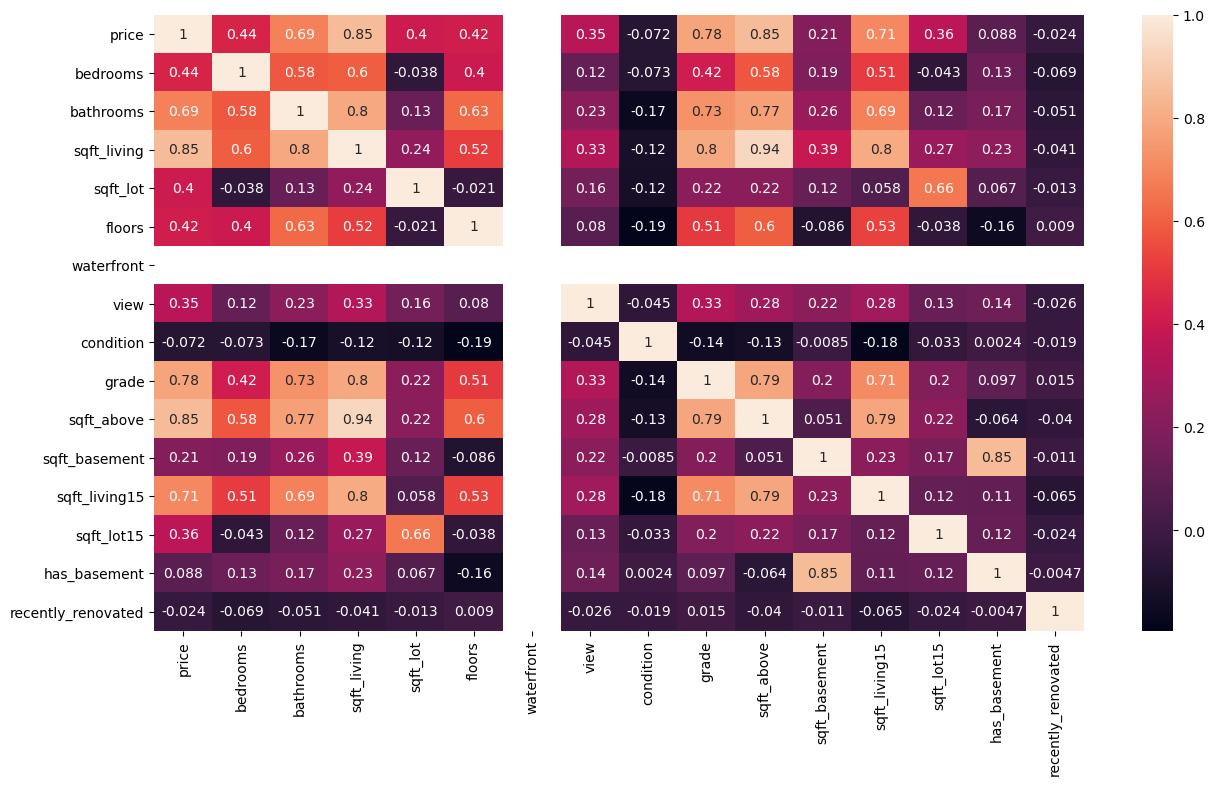

In [123]:
for i in regions_df.keys():
    corr = regions_df[i].loc[:, outliers].corr()
    fig = plt.subplots(figsize=(15,8))
    print('This is : {}'.format(i))
    sns.heatmap(corr, annot=True)
    plt.show()
    plt.clf()

In [127]:
for i in regions_df.keys():
    for x in outliers:    
        
        data = regions_df[i][x]

        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        regions_df[i][x] = np.where(data > upper, upper, data)
        regions_df[i][x] = np.where(data < lower, lower, data)

This is : Southwest


<Figure size 640x480 with 0 Axes>

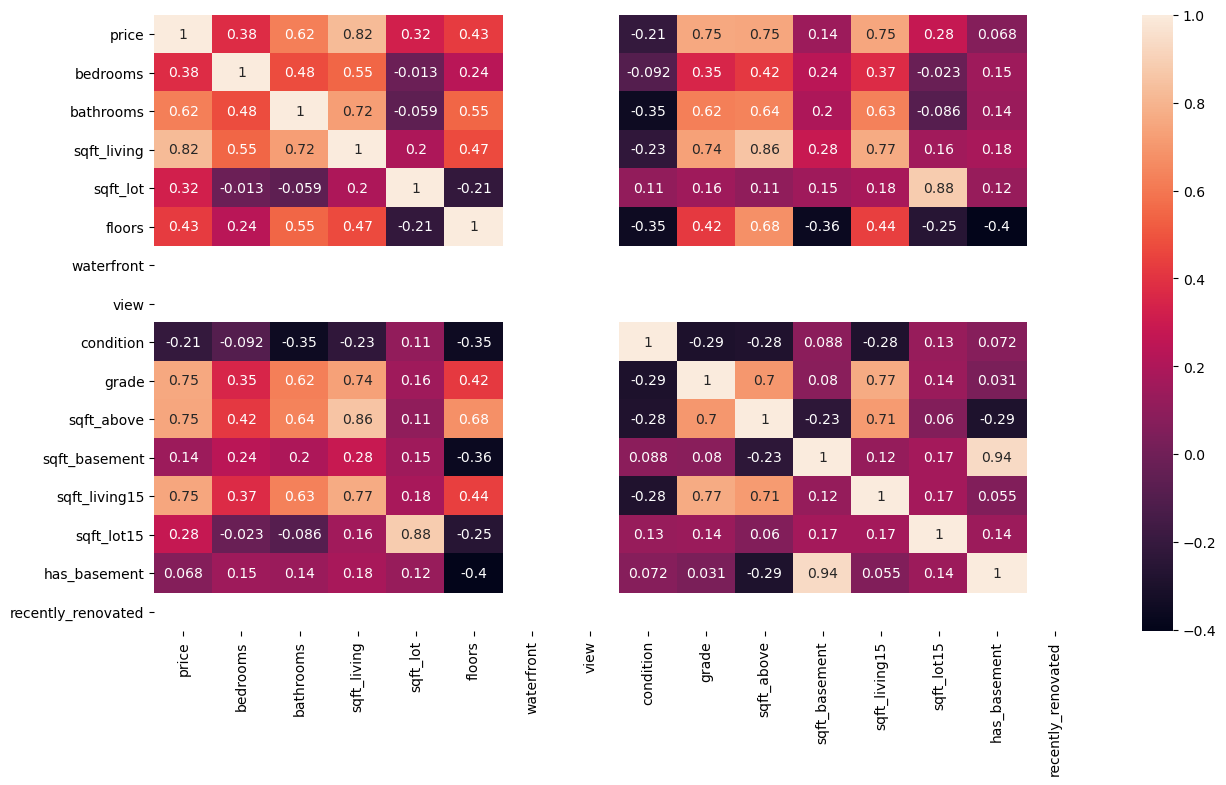

This is : Southeast


<Figure size 640x480 with 0 Axes>

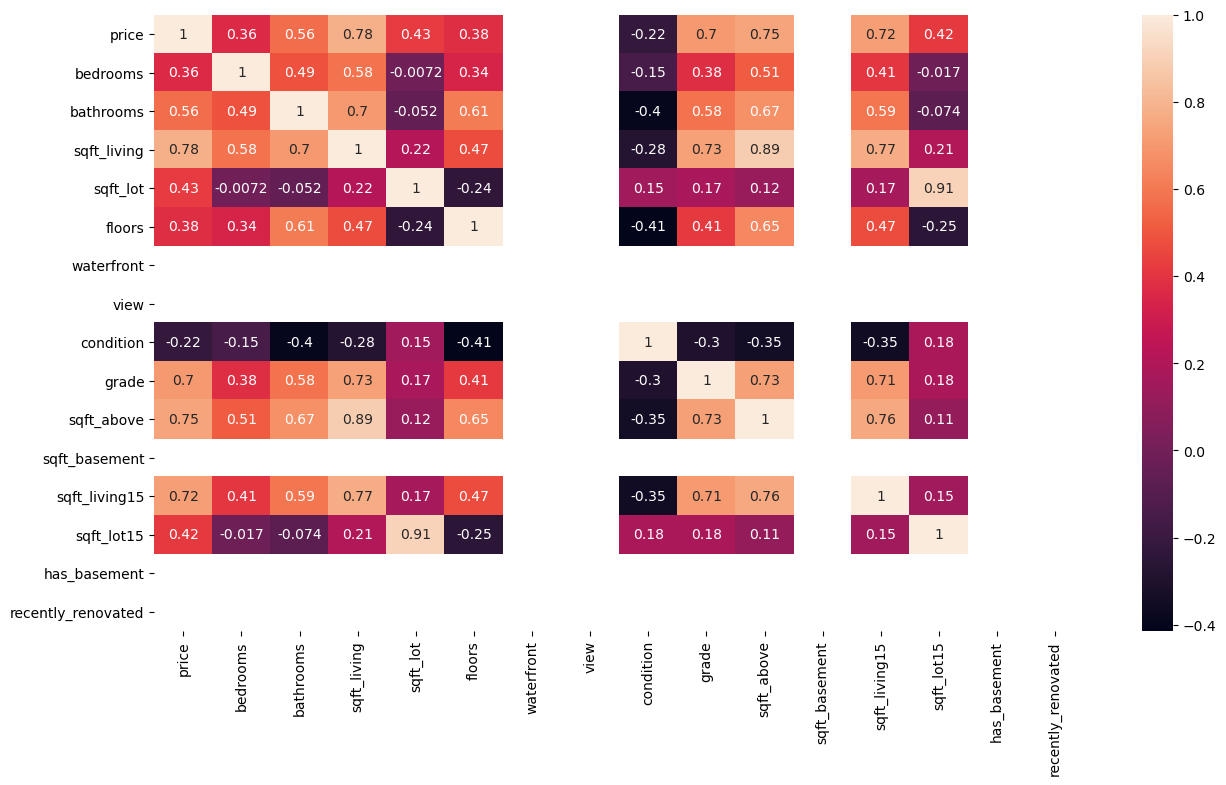

This is : Island


<Figure size 640x480 with 0 Axes>

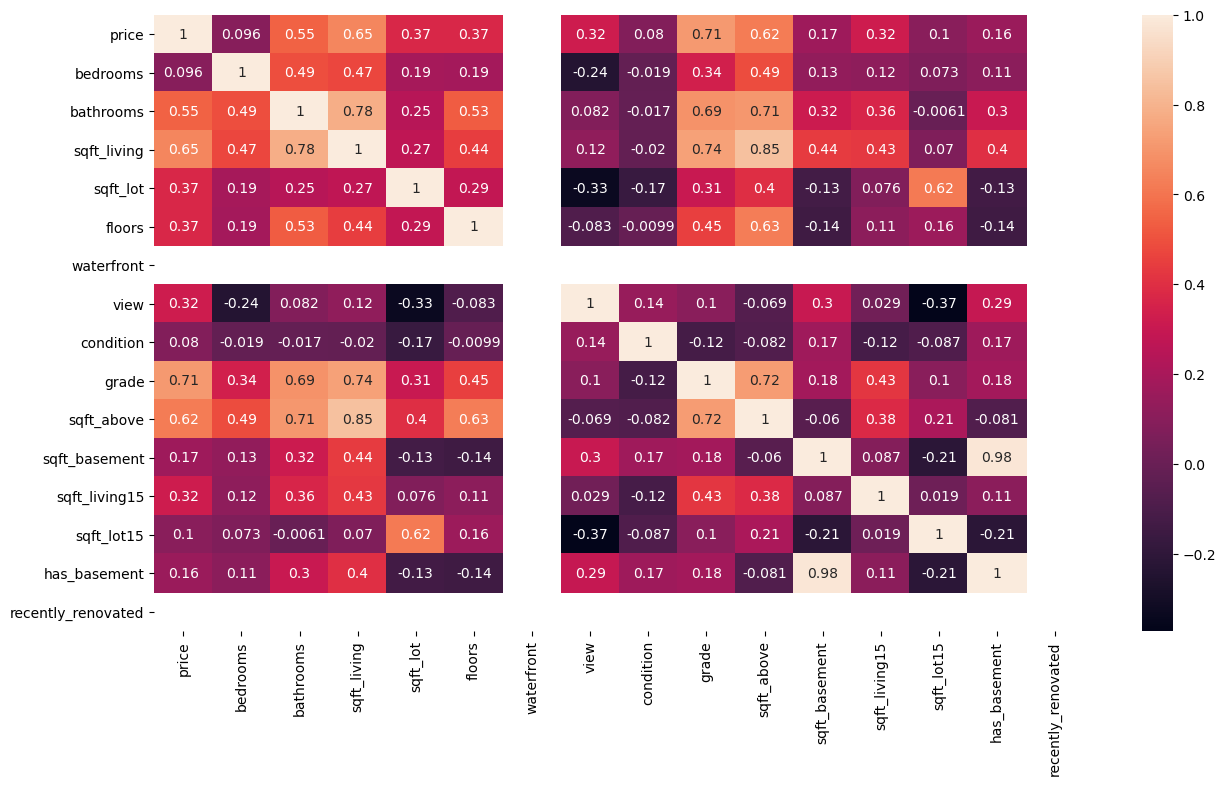

This is : South_of_Seattle


<Figure size 640x480 with 0 Axes>

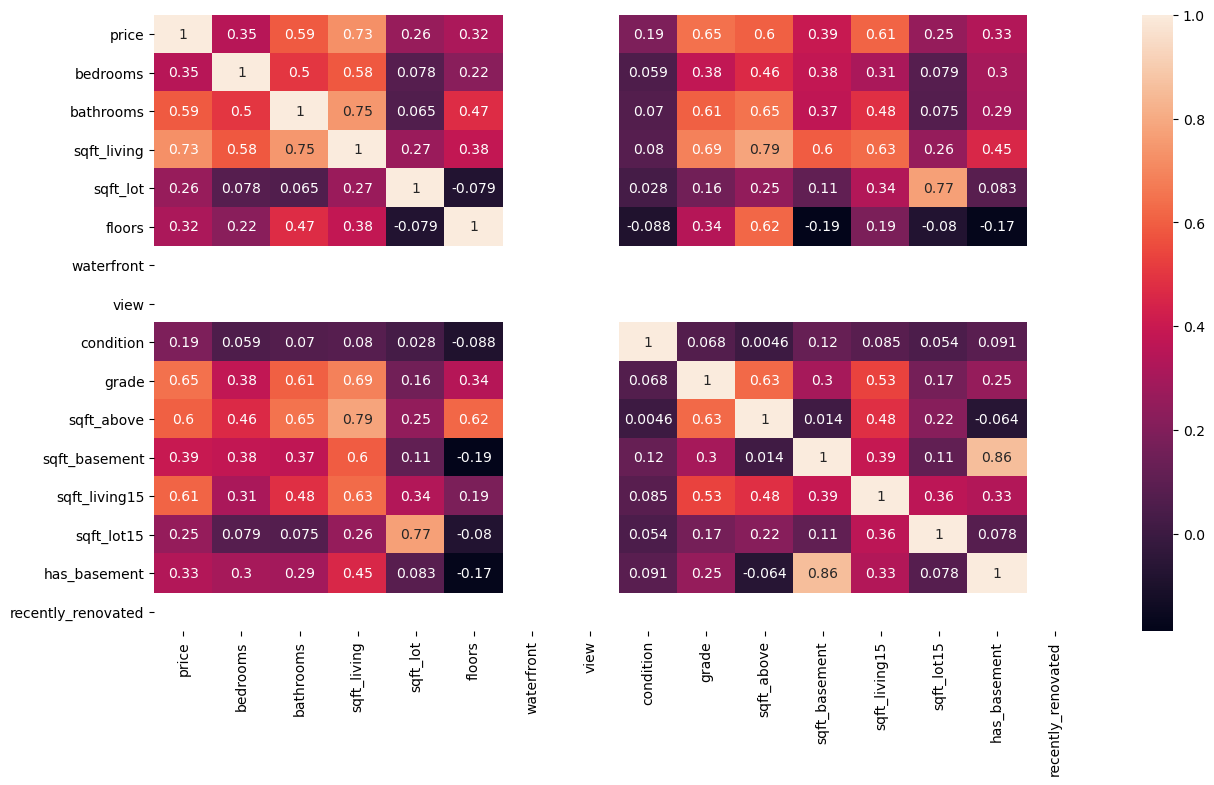

This is : Seattle


<Figure size 640x480 with 0 Axes>

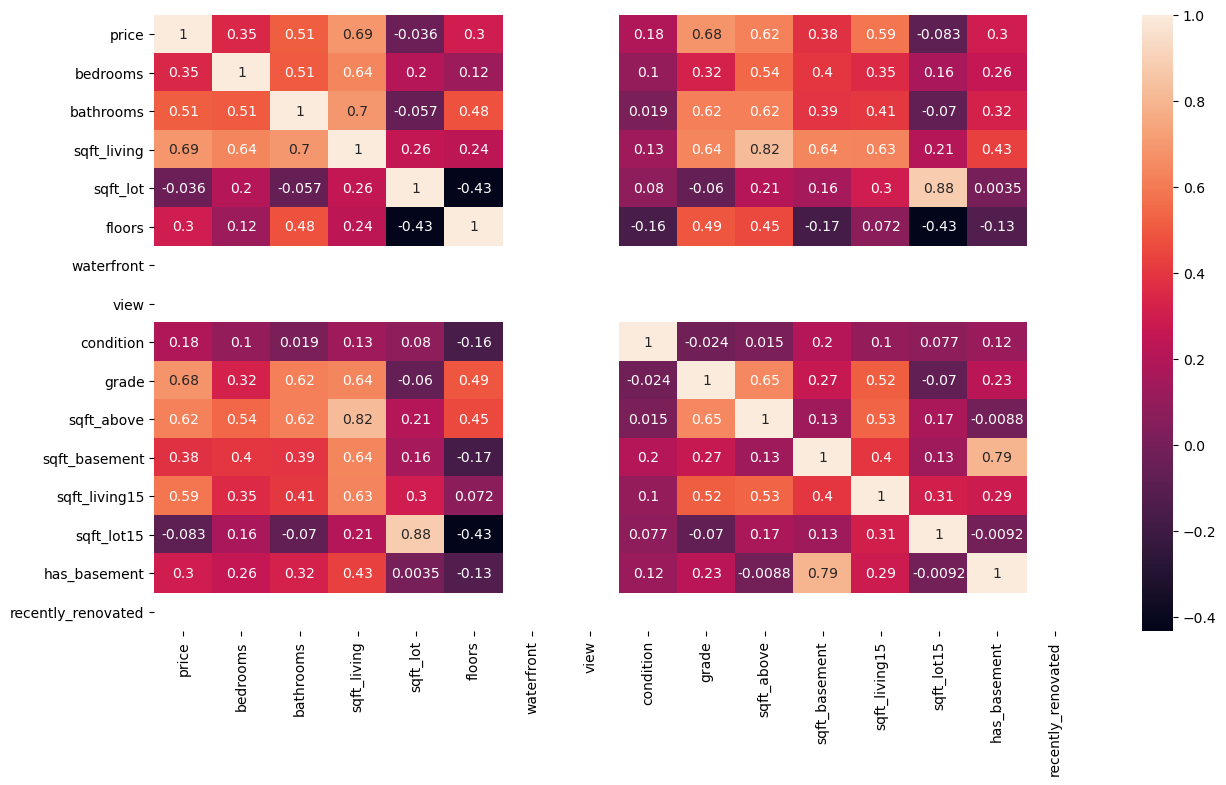

This is : Southeast_of_Seattle


<Figure size 640x480 with 0 Axes>

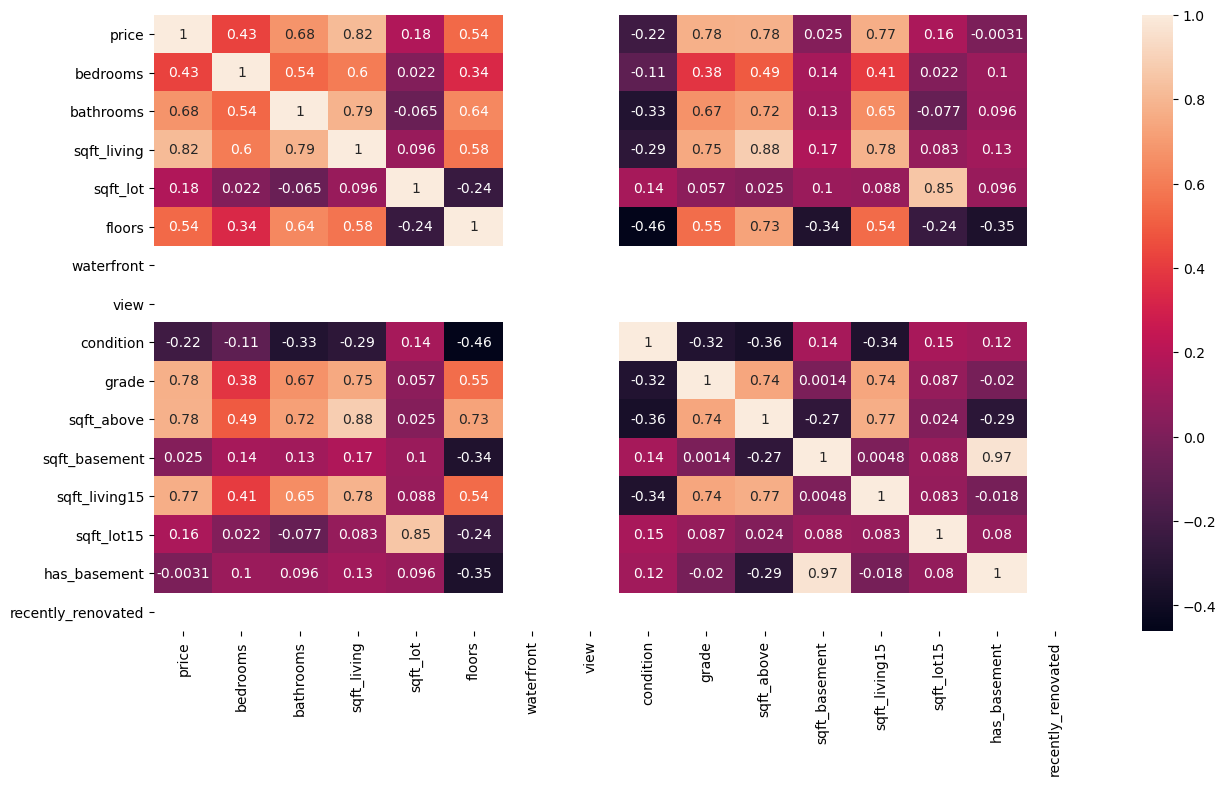

This is : Rich


<Figure size 640x480 with 0 Axes>

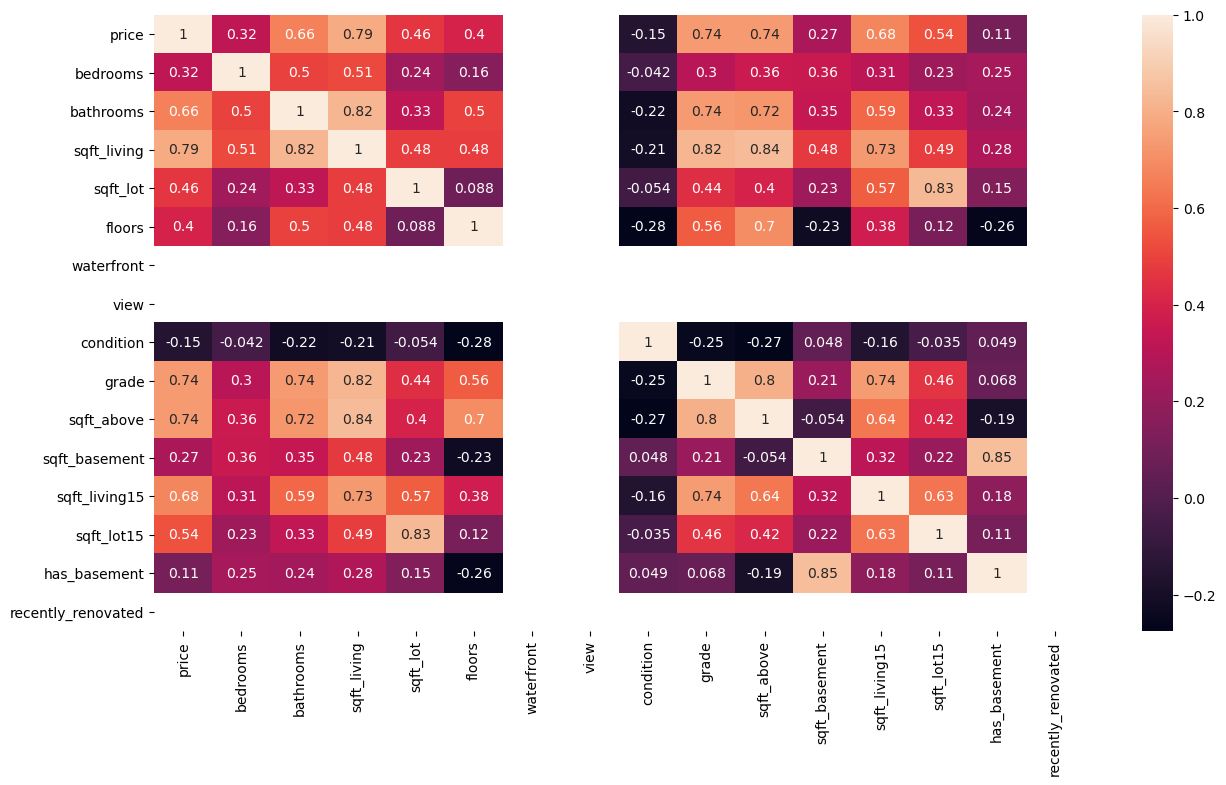

This is : Kirkland


<Figure size 640x480 with 0 Axes>

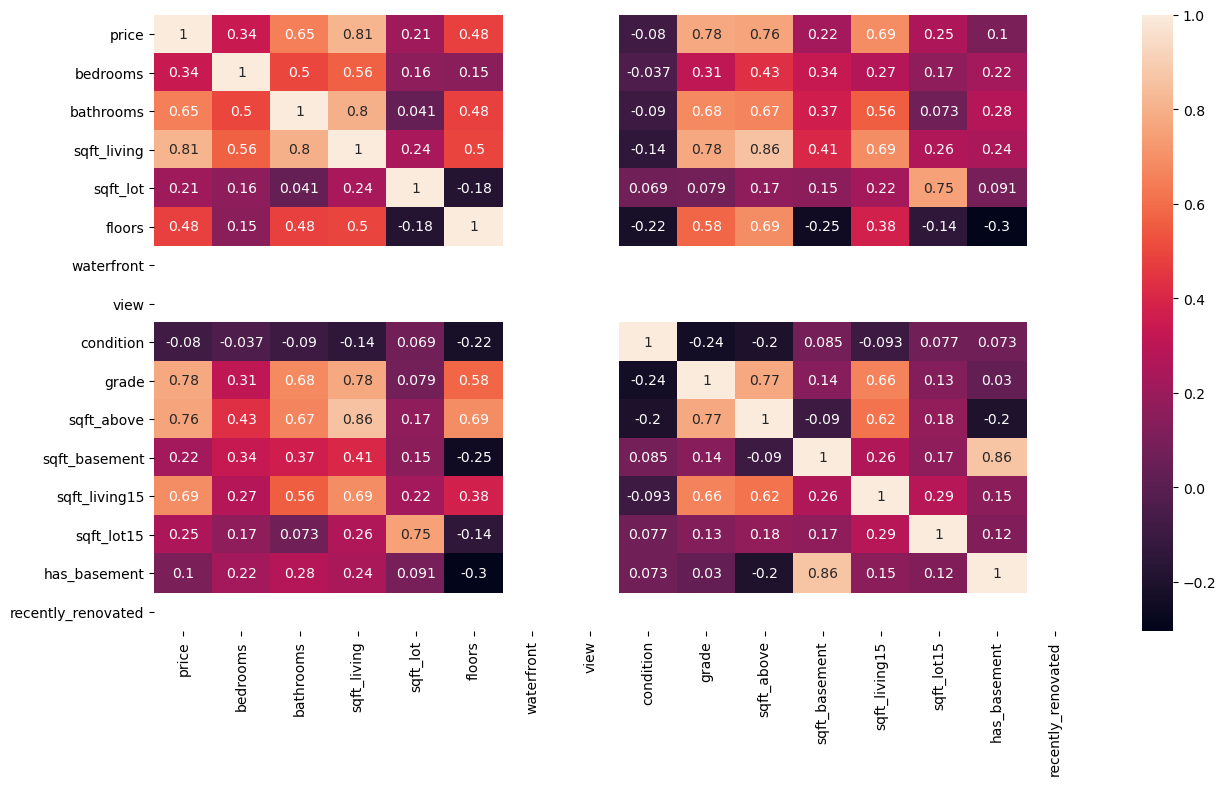

This is : Northeast


<Figure size 640x480 with 0 Axes>

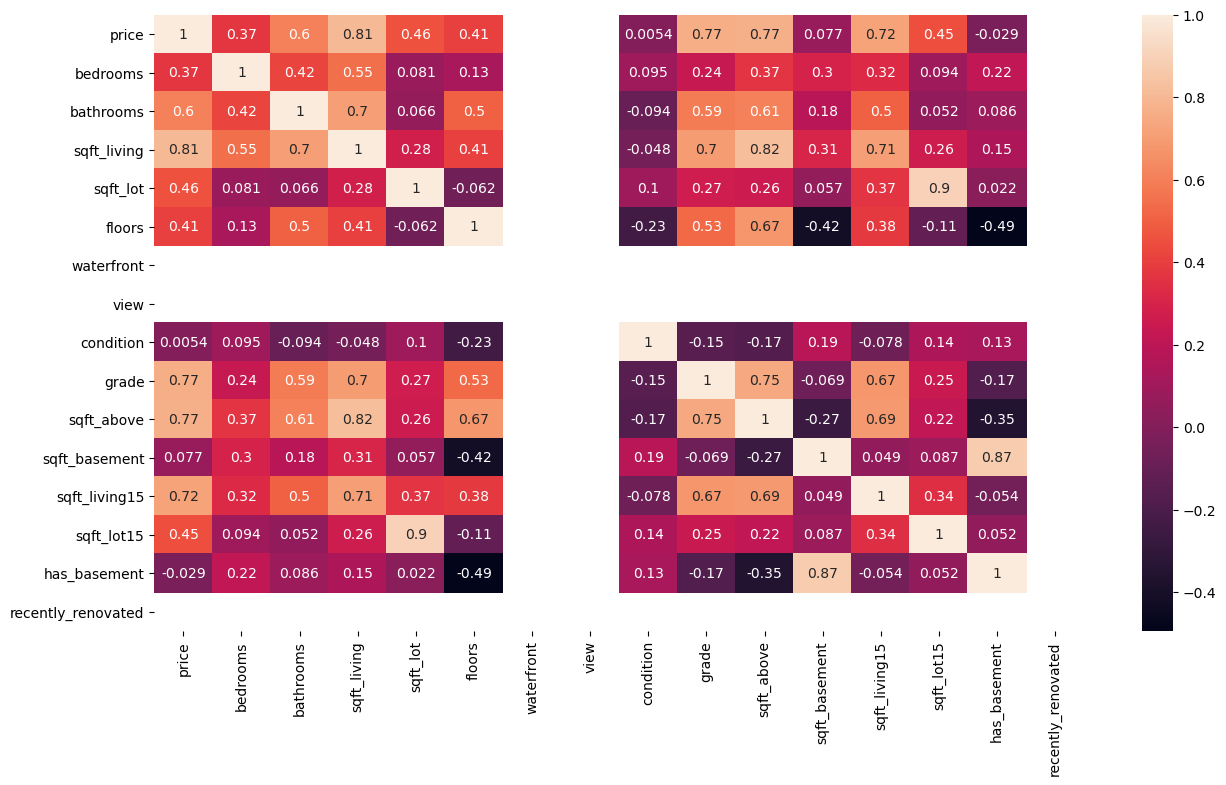

This is : North


<Figure size 640x480 with 0 Axes>

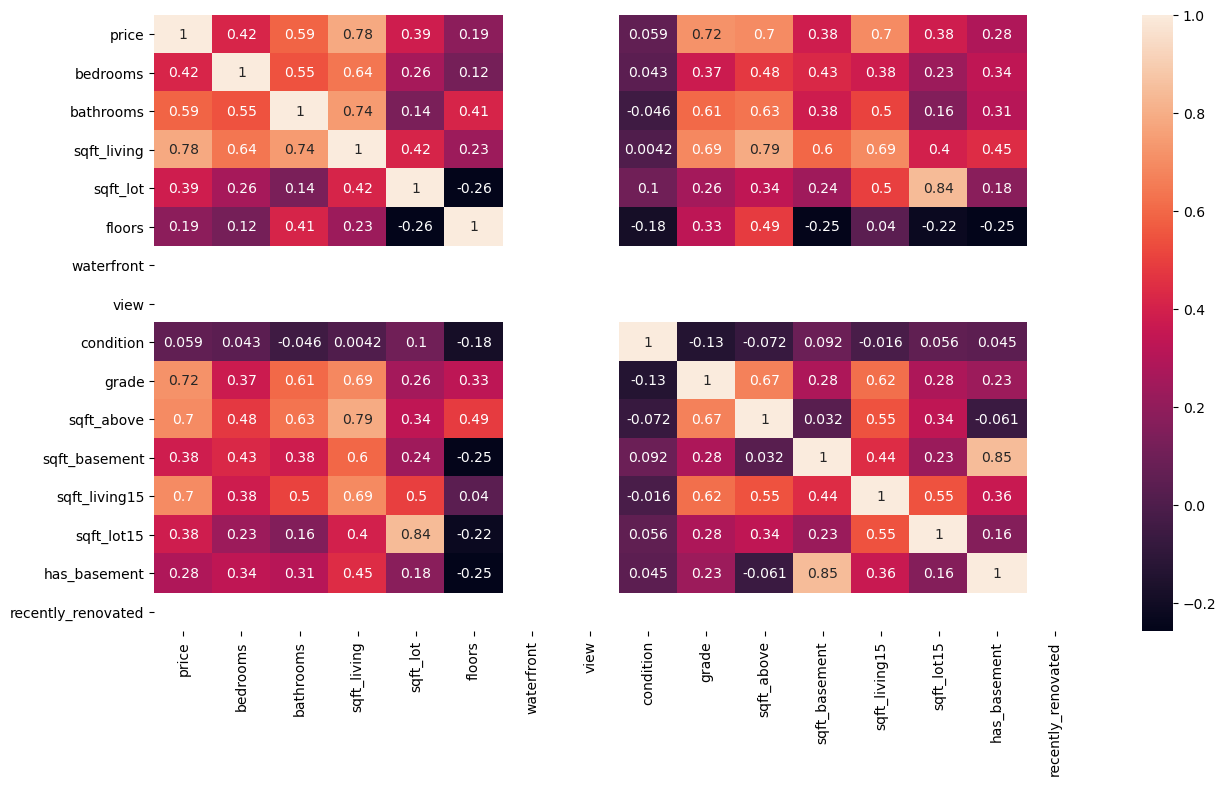

This is : Redmond


<Figure size 640x480 with 0 Axes>

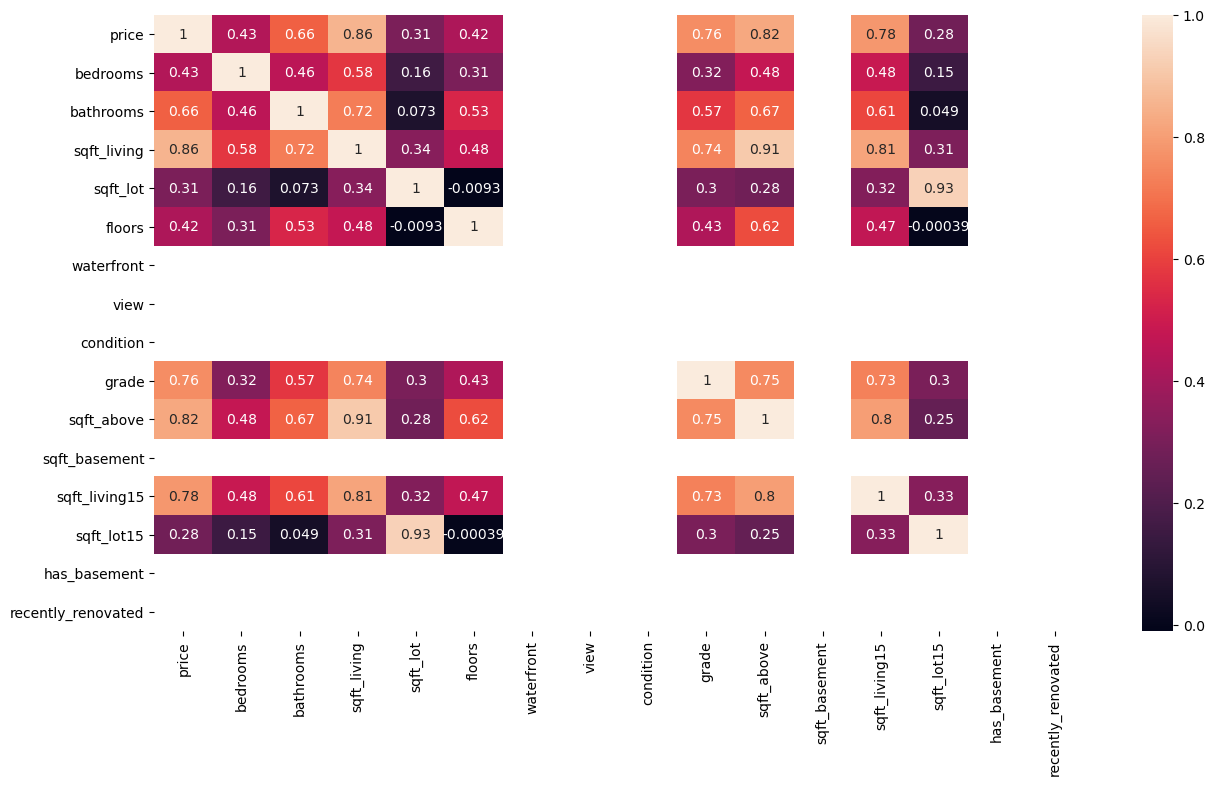

This is : Suburan


<Figure size 640x480 with 0 Axes>

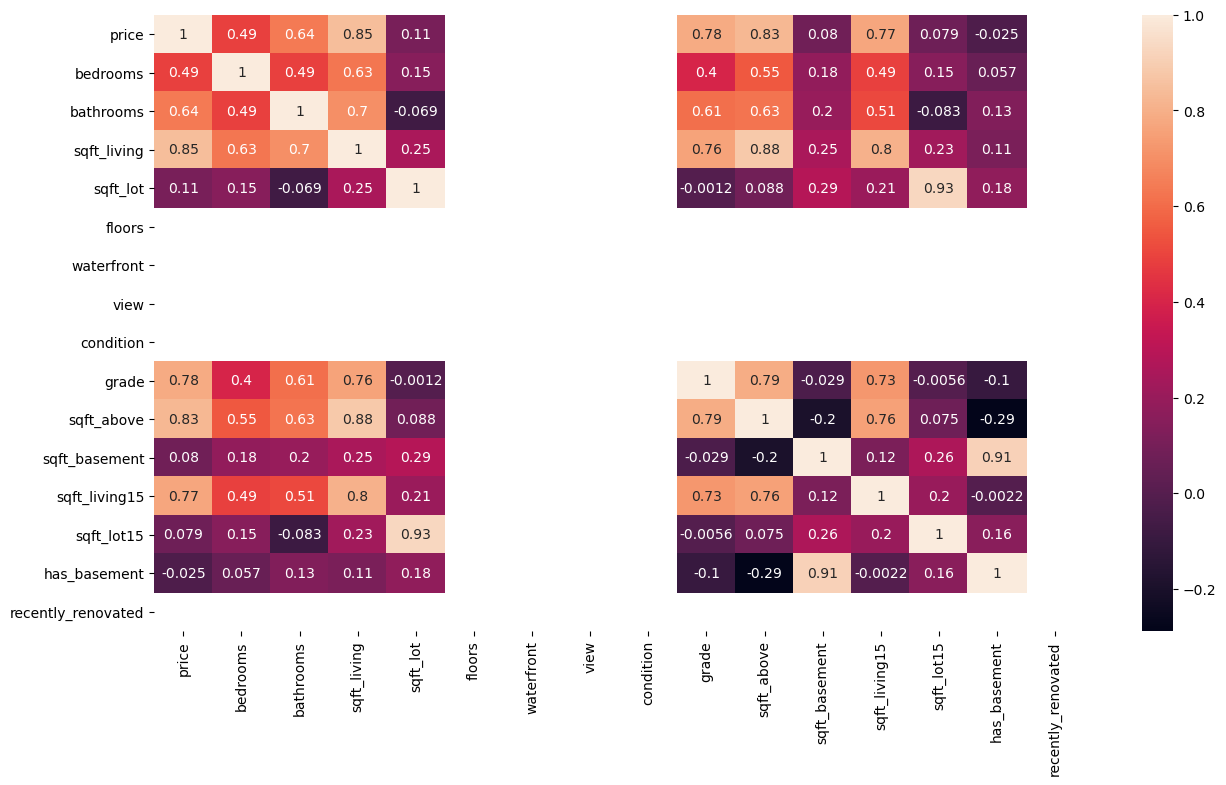

This is : Rural


<Figure size 640x480 with 0 Axes>

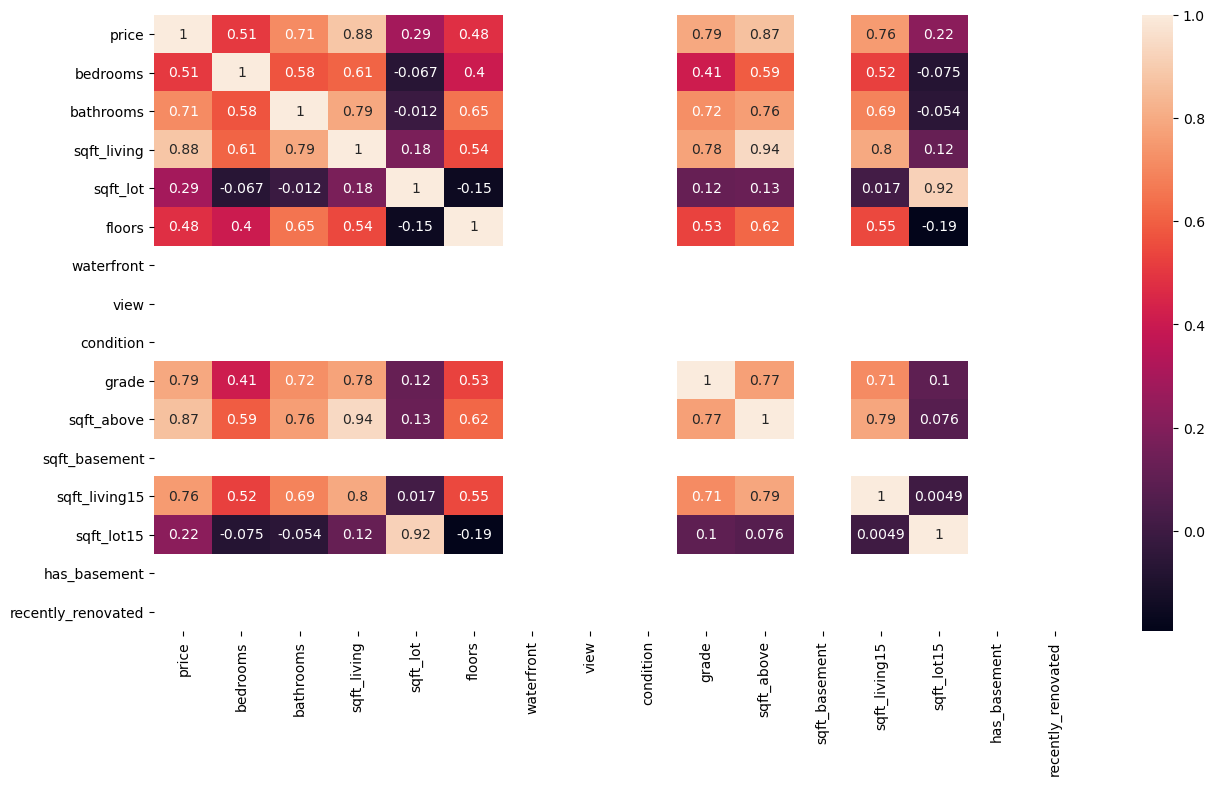

In [128]:
for i in regions_df.keys():
    corr = regions_df[i].loc[:, outliers].corr()
    fig = plt.subplots(figsize=(15,8))
    print('This is : {}'.format(i))
    sns.heatmap(corr, annot=True)
    plt.show()
    plt.clf()